In [22]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from scipy import stats

In [23]:
raw_data = pd.read_csv('dataset_school.csv')

In [24]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf (chisq, df)

In [25]:
raw_data

,Score,School,Gender
0,123,No,M
1,176,No,F
2,193,Yes,F
3,189,Yes,F
4,183,Yes,M
...,...,...,...
94,149,No,M
95,197,Yes,F
96,184,Yes,M
97,155,No,F


Changing Yes/No into 1/0: 

In [26]:
data = raw_data.copy()
data['School'] = data['School'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'F':1, 'M':0})

In [27]:
data

,Score,School,Gender
0,123,0,0
1,176,0,1
2,193,1,1
3,189,1,1
4,183,1,0
...,...,...,...
94,149,0,0
95,197,1,1
96,184,1,0
97,155,0,1


In [28]:
y = data['School']

In [29]:
x1 = data['Gender']

#### Logistic regression:

In [35]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log_GENDER = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.683133
         Iterations 4


In [37]:
results_log_GENDER.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 School   No. Observations:                   99
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                0.001998
Time:                        10:00:36   Log-Likelihood:                -67.630
converged:                       True   LL-Null:                       -67.766
Covariance Type:            nonrobust   LLR p-value:                    0.6028
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3716      0.291      1.278      0.201      -0.198       0.941
Gender        -0.2112      0.406     -0.520      0.603      -1.007       0.585
==============================================================================
"""

In [40]:
y = data['School']
x1 = data['Score']

In [41]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log_SCORE = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.174638
         Iterations 9


In [42]:
results_log_SCORE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 School   No. Observations:                   99
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                  0.7449
Time:                        10:01:35   Log-Likelihood:                -17.289
converged:                       True   LL-Null:                       -67.766
Covariance Type:            nonrobust   LLR p-value:                 9.420e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.2879     11.368     -4.072      0.000     -68.568     -24.008
Score          0.2767      0.067      4.109      0.000       0.145       0.409
==============================================================================
"""

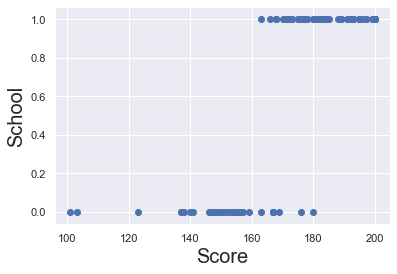

In [43]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Score', fontsize = 20)
plt.ylabel('School', fontsize = 20)
plt.show()

In [44]:
y = data['School']
x1 = data[['Score', 'Gender']]

In [46]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log_BOTH = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.172278
         Iterations 9


In [47]:
results_log_BOTH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 School   No. Observations:                   99
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                  0.7483
Time:                        10:07:08   Log-Likelihood:                -17.056
converged:                       True   LL-Null:                       -67.766
Covariance Type:            nonrobust   LLR p-value:                 9.482e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.2367     11.851     -3.986      0.000     -70.464     -24.009
Score          0.2840      0.071      4.019      0.000       0.145       0.422
Gender        -0.6103      0.904     -0.675      0.499      -2.381       1.161
==============================================================================
"""

In [48]:
np.exp(-0.6103)

0.5431878882621217

In [50]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log_SCORE.predict()

array([0.00, 0.89, 1.00, 1.00, 0.99, 0.01, 0.01, 0.00, 0.06, 1.00, 0.96,
       1.00, 1.00, 0.83, 0.86, 0.02, 0.73, 0.92, 0.04, 1.00, 0.99, 1.00,
       0.00, 0.48, 1.00, 1.00, 0.02, 0.96, 1.00, 0.55, 1.00, 1.00, 0.00,
       1.00, 0.94, 0.62, 0.55, 0.00, 0.00, 0.00, 0.01, 0.28, 1.00, 0.00,
       0.97, 0.00, 0.89, 0.00, 0.01, 0.05, 0.02, 1.00, 0.54, 0.03, 1.00,
       0.00, 0.40, 0.87, 0.17, 0.95, 0.04, 0.79, 1.00, 0.99, 0.92, 0.02,
       0.96, 0.04, 0.01, 0.89, 0.62, 0.92, 0.99, 0.05, 0.01, 0.00, 0.00,
       0.60, 1.00, 1.00, 0.98, 1.00, 0.99, 0.00, 1.00, 1.00, 0.00, 1.00,
       0.96, 0.46, 0.55, 0.00, 0.87, 0.73, 0.01, 1.00, 0.99, 0.02, 0.98])

In [51]:
np.array(data['School'])

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [52]:
results_log_SCORE.pred_table()

array([[37.00, 6.00],
       [3.00, 53.00]])

In [54]:
matrix = pd.DataFrame(results_log_SCORE.pred_table())
matrix.columns = ['Pred 0', 'Pred 1']
matrix = matrix.rename(index={0:'Actual 0', 1:'Actual 1'})
matrix

,Pred 0,Pred 1
Actual 0,37.0,6.0
Actual 1,3.0,53.0


In [55]:
confusion = np.array(matrix)
accuracy_train = (confusion[0,0]+confusion[1,1])/confusion.sum()
accuracy_train

0.9090909090909091

#### Testing:

In [63]:
test = pd.read_csv('TESTdataset_school.csv')

In [64]:
test

,Score,School,Gender
0,133,No,M
1,176,No,M
2,199,Yes,F
3,179,Yes,F
4,193,Yes,M
5,123,No,M
6,122,No,F
7,143,No,F
8,162,No,M
9,200,Yes,M


In [65]:
test['School'] = test['School'].map({'Yes':1, 'No':0})
test['Gender'] = test ['Gender'].map({'F':1, 'M':0})
test

,Score,School,Gender
0,133,0,0
1,176,0,0
2,199,1,1
3,179,1,1
4,193,1,0
5,123,0,0
6,122,0,1
7,143,0,1
8,162,0,0
9,200,1,0


In [66]:
x

,const,Score,Gender
0,1.0,123,0
1,1.0,176,1
2,1.0,193,1
3,1.0,189,1
4,1.0,183,0
...,...,...,...
94,1.0,149,0
95,1.0,197,1
96,1.0,184,0
97,1.0,155,1


In [67]:
test_actual = test['School']
test_data = test.drop(['School'], axis = 1)
test_data = sm.add_constant(test_data)
test_data

,const,Score,Gender
0,1.0,133,0
1,1.0,176,0
2,1.0,199,1
3,1.0,179,1
4,1.0,193,0
5,1.0,123,0
6,1.0,122,1
7,1.0,143,1
8,1.0,162,0
9,1.0,200,0


In [72]:
test_actual

0     0
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    1
17    1
18    0
19    1
Name: School, dtype: int64

In [73]:
def confusion_matrix(data, actual_values, model):
    
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [76]:
cm = confusion_matrix(test_data, test_actual, results_log_SCORE)
cm

(array([[7.00, 1.00],
        [1.00, 11.00]]),
 0.9)

In [77]:
print( 'Missclasification rate: ' +str ((1+1)/20))

Missclasification rate: 0.1
